# Titanic Prediction

[Here](https://www.kaggle.com/competitions/titanic/leaderboard)

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

## Read Dataset and Identify columns with missing values

In [2]:
# Read Train and Test Data
train_df = pd.read_csv("../data/input/train.csv", index_col=0)
test_df = pd.read_csv("../data/input/test.csv", index_col=0)

In [3]:
# train missing value 
train_mis_val_cnt = train_df.isna().sum()
train_mis_val_cnt = train_mis_val_cnt[train_mis_val_cnt > 0]

# test missing value
test_mis_val_cnt = test_df.isna().sum()
test_mis_val_cnt = test_mis_val_cnt[test_mis_val_cnt > 0]

Text(0.5, 1.0, 'Train Missing Value Count')

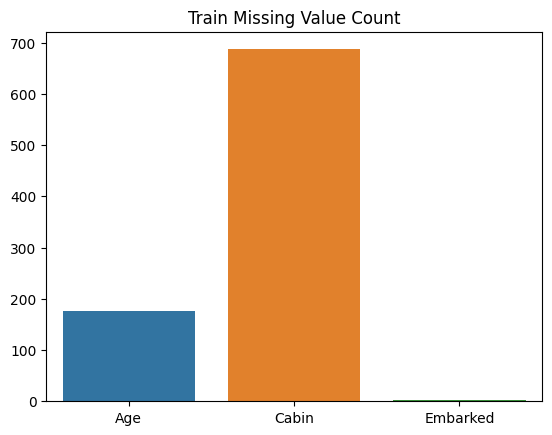

In [4]:
sb.barplot(x = train_mis_val_cnt.index, y = train_mis_val_cnt)
plt.title("Train Missing Value Count")

Text(0.5, 1.0, 'Test Missing Value Count')

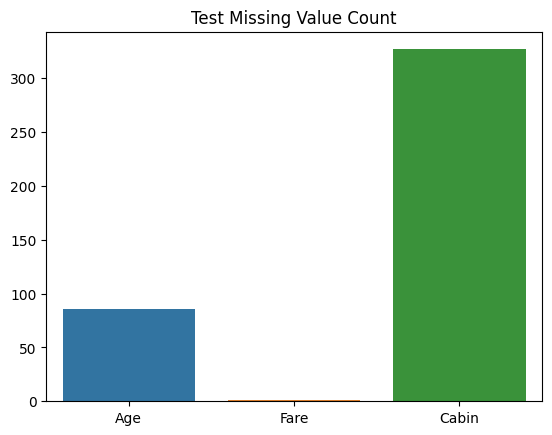

In [5]:
# Test Missing Value Count
sb.barplot(x = test_mis_val_cnt.index, y = test_mis_val_cnt)
plt.title("Test Missing Value Count")

**Note on Missing Values:**
1. Four columns have missing value [Age, Fare, Cabin, Embarked]
2. Cabin and Age columns are with higher number of missing values
3. Embarked and Fare very less number of missing values.

## Handling Missing Values

### Handle Age Column Missing Value

Text(0.5, 1.0, 'Gender Count')

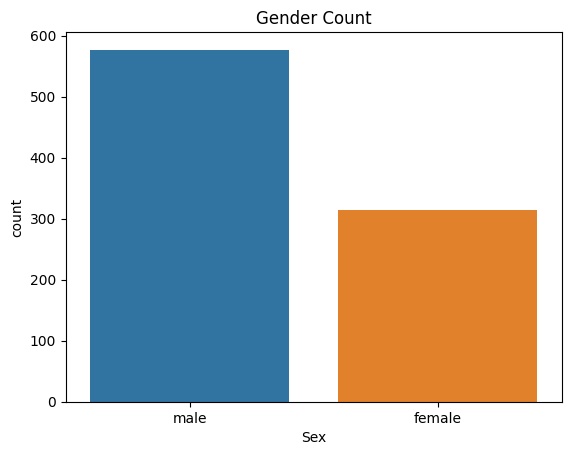

In [6]:
sb.countplot(x = train_df['Sex'])
plt.title("Gender Count")
# More number of males compared to females

Text(0.5, 1.0, 'Gender Survived vs Non-Survived Count')

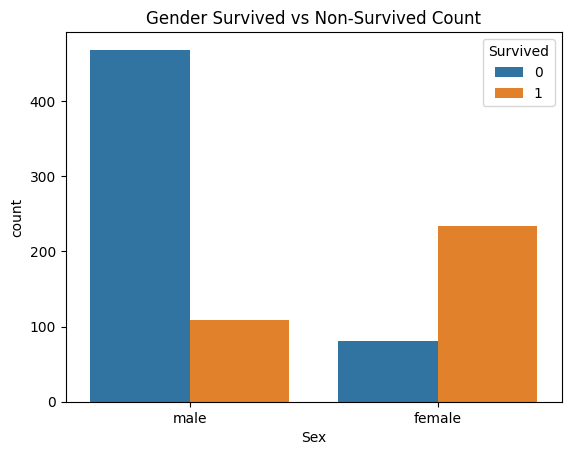

In [7]:
sb.countplot(x = train_df['Sex'], hue=train_df['Survived'])
plt.title("Gender Survived vs Non-Survived Count")
# More number of females survived compared to males

Text(0.5, 1.0, 'PClass Count')

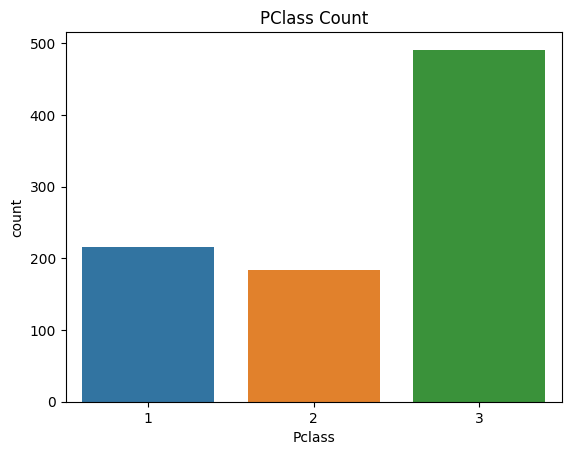

In [8]:
sb.countplot(x = train_df['Pclass'])
plt.title("PClass Count")

# More number of class 3 Passengers

Text(0.5, 1.0, 'PClass Survived vs Non-Survived Count')

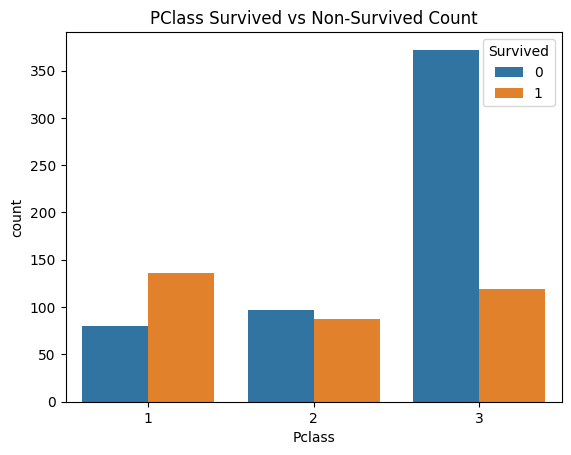

In [9]:
sb.countplot(x = train_df['Pclass'], hue = train_df['Survived'])
plt.title("PClass Survived vs Non-Survived Count")
# More number of class 1 Passengers survived compared to class 1 and class 2 passengers.

<Axes: xlabel='Sex', ylabel='Age'>

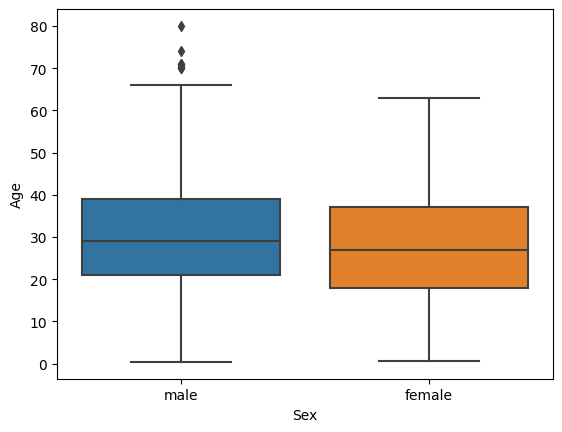

In [10]:
sb.boxplot(x = train_df['Sex'], y = train_df['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

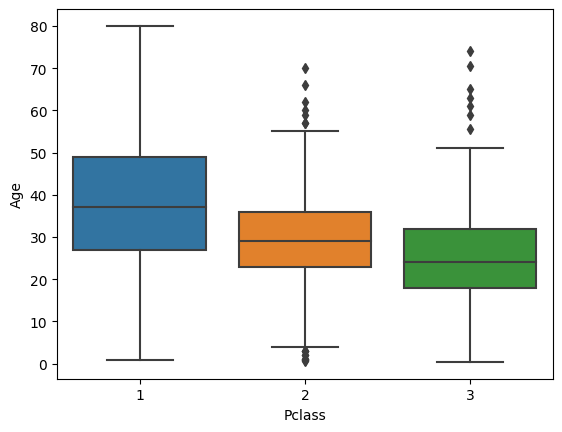

In [11]:
sb.boxplot(x = train_df['Pclass'], y = train_df['Age'])

In [12]:
# Detemine the median age for each Pclass
age_by_pclass = train_df.groupby('Pclass').aggregate({'Age': 'median'})['Age'].to_dict()

# Method to fill missing age value by Pclass
def fill_age(pclass, age):
    if age is None or np.isnan(age):
        return age_by_pclass[pclass]
    return age

train_df['Age'] = train_df.apply(lambda row: fill_age(row['Pclass'], row['Age']), axis=1)
test_df['Age'] = test_df.apply(lambda row: fill_age(row['Pclass'], row['Age']), axis=1)

In [13]:
train_df['Age'].isna().sum()
# No missing value after filling the missing value with median age value

0

In [14]:
test_df['Age'].isna().sum()
# No missing value after filling the missing value with median age value

0

### Handle Embarked Column Missing Value

<Axes: xlabel='Embarked', ylabel='count'>

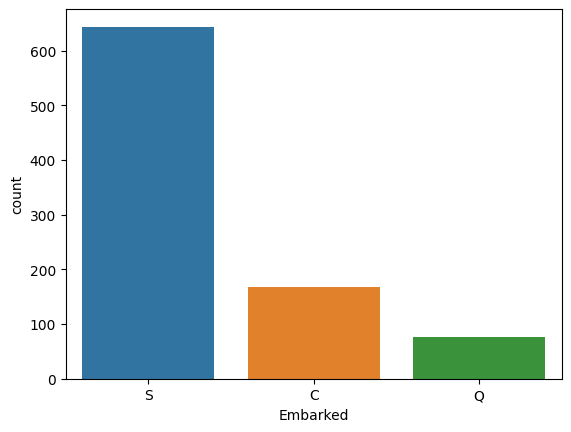

In [15]:
sb.countplot(x = train_df['Embarked'])
# Most people embarked from S

<Axes: xlabel='Embarked', ylabel='Fare'>

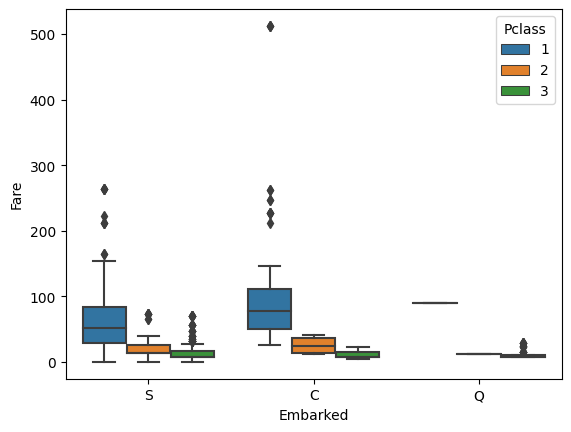

In [16]:
sb.boxplot(data = train_df, x = 'Embarked', y = 'Fare', hue = 'Pclass')

In [17]:
train_df.loc[train_df['Embarked'].isna(), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
train_df.loc[train_df['Cabin'] == 'B28', :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: xlabel='Embarked', ylabel='count'>

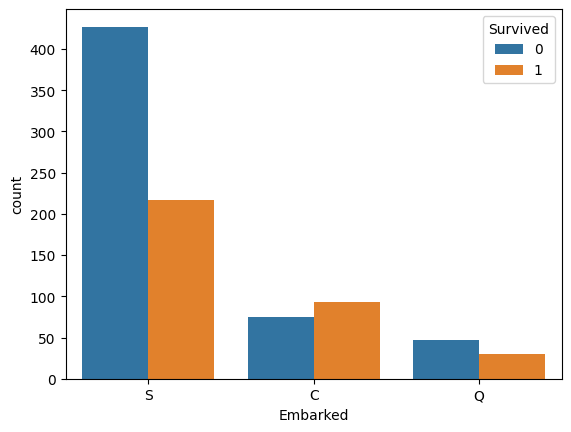

In [19]:
sb.countplot(x = train_df['Embarked'], hue = train_df['Survived'])

**Note on Embarked Missing Value Fill**

1. Both Passenger are Female, Pclass 1, and Survived.
2. Comparing the Fare Price both the passengers are assumed to be embarked from 'S'.

In [20]:
# Fill Embarked Column missing value
train_df.loc[train_df['Embarked'].isna(), ['Embarked']] = 'S'

In [21]:
# Verify the count of null value after filling
train_df['Embarked'].isna().sum()

0

### Handle Cabin Column Missing Value

Too many missing value in Cabin column. so we can ignore the cabin column

### Handle Fare Column Missing Value

<Axes: xlabel='Pclass', ylabel='Fare'>

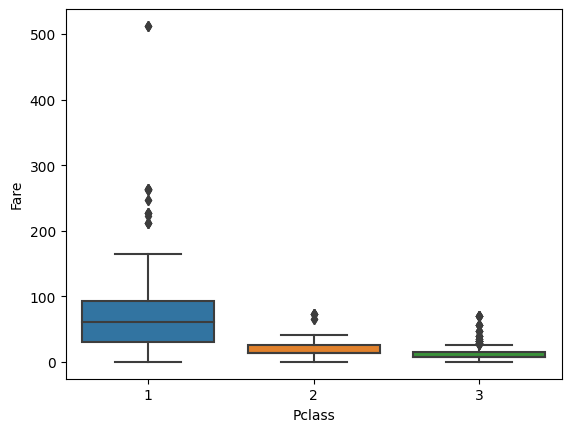

In [22]:
# similar to Embarked Analysis

sb.boxplot(x = train_df['Pclass'], y = train_df['Fare'])

<Axes: xlabel='Embarked', ylabel='Fare'>

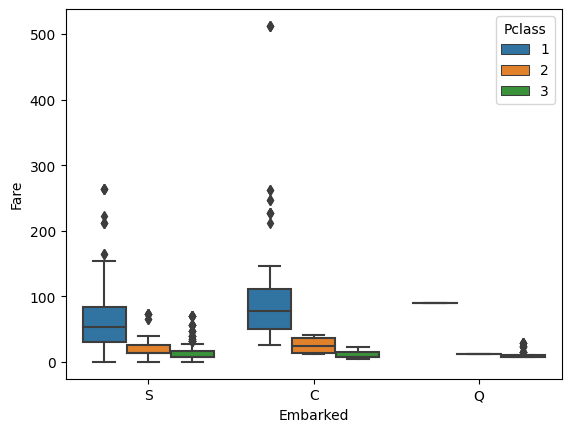

In [23]:
sb.boxplot(x = train_df['Embarked'], y = train_df['Fare'], hue=train_df['Pclass'])

In [24]:
fare_by_pclass_and_embarked = train_df.groupby(['Embarked', 'Pclass']).Fare.median().unstack().to_dict()

def fill_fare(pclass, embarked, fare):
    if fare is None or np.isnan(fare):
        return fare_by_pclass_and_embarked[pclass][embarked]
    return fare

test_df['Fare'] = test_df.apply(lambda row: fill_fare(row['Pclass'], row['Embarked'], row['Fare']), axis = 1)

In [25]:
train_df_clean = train_df.drop(['Cabin', 'Name', 'Ticket'], axis = 1) # name column not required
test_df_clean = test_df.drop(['Cabin', 'Name',  'Ticket'], axis = 1) # name columns not required

In [26]:
train_df_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
test_df_clean.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Save clean DataFrame

In [28]:
train_df_clean.to_csv("../data/transformed/train_df_clean.csv", sep=',', index=True)
test_df_clean.to_csv("../data/transformed/test_df_clean.csv", sep=',', index=True)